# Library Function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#text preprocesing
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#sampling
from imblearn.under_sampling import RandomUnderSampler

# Import the Dataset

In [2]:
df = pd.read_csv('Emotions_training.csv')

In [3]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


# Converting into Lower case

In [4]:
df['text'] = df['text'].str.lower()

# Removing the Links

In [5]:
import re

df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Removing next lines

In [6]:
df['text'] = df['text'].str.replace('\n', '')

# Removing words contains numbers

In [7]:
df['text'] = df['text'].apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))

# Removing extra spaces

In [8]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

# Removing special characters

In [9]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Removal of Stop words

In [10]:
from gensim.parsing.preprocessing import remove_stopwords

df['text'] = df['text'].apply(remove_stopwords)

# Stemming

In [11]:
# Initialize the Porter Stemmer
porter = PorterStemmer()

# Define function to apply stemming using NLTK Porter Stemmer
def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply stemming
df['text'] = df['text'].apply(apply_stemming)

# Lemmatization

In [12]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function to apply lemmatization using NLTK WordNet Lemmatizer
def apply_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization
df['text'] = df['text'].apply(apply_lemmatization)

# Plot Representation

In [13]:
# Create empty lists for each label class
sadness_texts = []
joy_texts = []
love_texts = []
anger_texts = []
fear_texts = []
surprise_texts = []

# Group texts by label
for index, row in df.iterrows():
    label = row['label']
    text = row['text']
    if label == 0:
        sadness_texts.append(text)
    elif label == 1:
        joy_texts.append(text)
    elif label == 2:
        love_texts.append(text)
    elif label == 3:
        anger_texts.append(text)
    elif label == 4:
        fear_texts.append(text)
    elif label == 5:
        surprise_texts.append(text)

# Displaying count of each class/label
label_counts = df['label'].value_counts().sort_index()
print("Count of each class/label:")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")

# Printing a few examples from each class
print("\nExamples from each class:")
print("Sadness:")
print(sadness_texts[:5])
print("\nJoy:")
print(joy_texts[:5])
print("\nLove:")
print(love_texts[:5])
print("\nAnger:")
print(anger_texts[:5])
print("\nFear:")
print(fear_texts[:5])
print("\nSurprise:")
print(surprise_texts[:5])

Count of each class/label:
Label 0: 4666
Label 1: 5362
Label 2: 1304
Label 3: 2159
Label 4: 1937
Label 5: 572

Examples from each class:
Sadness:
['didnt feel humili', 'feel hopeless damn hope care awak', 'ive feel littl burden late wasnt sure', 'feel like suffer m see mean', 'feel low energi m thirsti']

Joy:
['petrona year feel petrona perform huge profit', 'feel run divin experi expect type spiritu encount', 'immens sympathi gener point possibl proto writer tri time write corner life sign agent let publish contract feel littl preciou', 'feel reassur anxieti', 'feel amus delight']

Love:
['feel nostalg fireplac know properti', 'feel romant', 't let sad feel want accept home', 'ate feel gentl tingl feel heal take place cellular level', 'suppos truth need share havent feel faith late ive dwell doubt uncertainti faith']

Anger:
['im grab minut post feel greedi wrong', 'feel grouchi', 'think s easiest time year feel dissatisfi', 'feel irrit reject say', 'feel like fuck dont usual eat mor

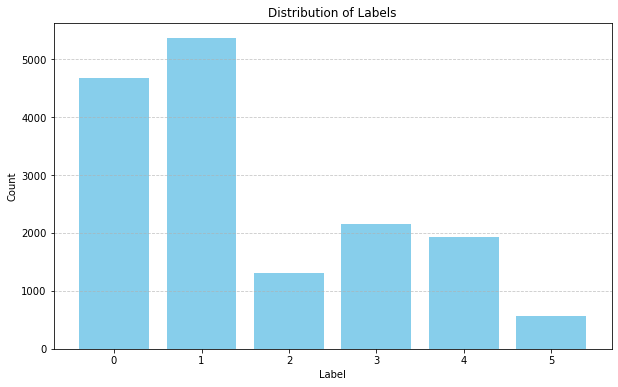

In [14]:
# Count the occurrences of each label
label_counts = df['label'].value_counts().sort_index()

# Plotting the distribution of labels
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(label_counts.index)  # Set x-axis ticks to label values
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()


In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(df['text'].values.reshape(-1, 1), df['label'])

# Convert the undersampled data back to a DataFrame
df_resampled = pd.DataFrame({'text': X_resampled.flatten(), 'label': y_resampled})

# Check the class distribution after undersampling
print(df_resampled['label'].value_counts())

0    572
1    572
2    572
3    572
4    572
5    572
Name: label, dtype: int64


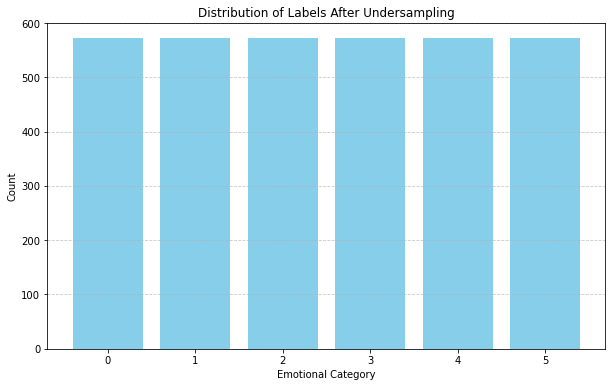

In [16]:
# Count the occurrences of each label after undersampling
label_counts_resampled = df_resampled['label'].value_counts().sort_index()

# Plotting the distribution of labels after undersampling
plt.figure(figsize=(10, 6))
plt.bar(label_counts_resampled.index, label_counts_resampled.values, color='skyblue')
plt.xlabel('Emotional Category')
plt.ylabel('Count')
plt.title('Distribution of Labels After Undersampling')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()


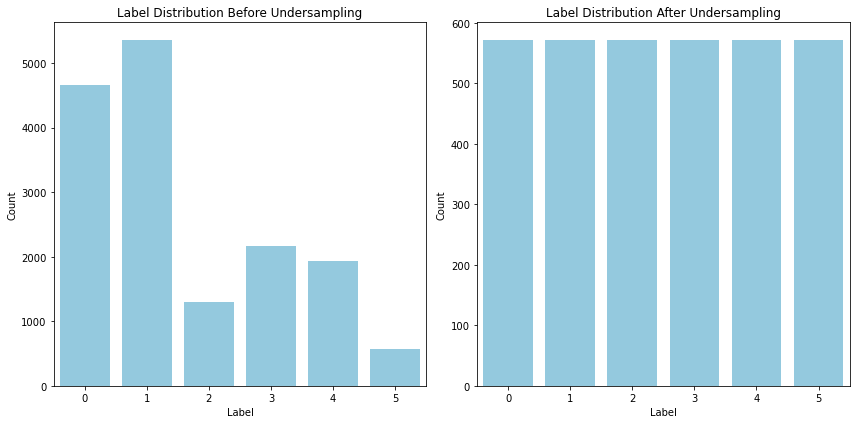

In [17]:
# Count the occurrences of each label before undersampling
label_counts_before = df['label'].value_counts()

# Count the occurrences of each label after undersampling
label_counts_after = df_resampled['label'].value_counts()

# Plot the distribution before and after undersampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=label_counts_before.index, y=label_counts_before.values, color='skyblue')
plt.title('Label Distribution Before Undersampling')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=label_counts_after.index, y=label_counts_after.values, color='skyblue')
plt.title('Label Distribution After Undersampling')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



# Feature Engineering

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler


# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df_resampled['text'])

# Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the Tf-IDF matrix with the labels
df_tfidf = pd.concat([tfidf_df, df_resampled['label']], axis=1)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler

# Mapping of numerical labels to emotional categories
label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}


# Divide the dataset in to Train, Test and Validation datasets.

70% of the undersampled data is used for training (X_train, y_train).
20% of the undersampled data is used for testing (X_test, y_test).
10% of the undersampled data is used for validation (X_val, y_val).

In [20]:
# Split the undersampled dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled['text'], df_resampled['label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)


1. TF-IDF Vectorizer: This step is represented by the TfidfVectorizer() function, which is responsible for converting text data into TF-IDF features.
2. Random Forest Classifier: This step is represented by the RandomForestClassifier() function, which is the classifier used for prediction.

In [21]:
# Define a pipeline with TF-IDF vectorizer and classifier
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

In [22]:
# Define hyperparameters grid for RandomForestClassifier
param_grid_rf = {
    'tfidf__max_features': [1000, 5000],  # Grid of values for max_features parameter of TfidfVectorizer
    'clf__n_estimators': [100, 200],      # Grid of values for n_estimators parameter of RandomForestClassifier
    'clf__max_depth': [None, 10]          # Grid of values for max_depth parameter of RandomForestClassifier
}


In [23]:
# Perform grid search for RandomForestClassifier
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1)

In [24]:
# Fit the RandomForestClassifier model
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10],
                         'clf__n_estimators': [100, 200],
                         'tfidf__max_features': [1000, 5000]})

In [25]:
# Function to generate classification report and confusion matrix for testing data
def generate_testing_report(model, X_test, y_test):
    print("\nClassification Report - Testing Data:")
    print(classification_report(y_test, model.predict(X_test)))
    print("\nConfusion Matrix - Testing Data:")
    print(confusion_matrix(y_test, model.predict(X_test)))

In [26]:
# Generate classification reports for RandomForestClassifier on testing data
print("\nRandom Forest Model:")
generate_testing_report(grid_search_rf, X_test, y_test)



Random Forest Model:

Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62       139
           1       0.60      0.62      0.61       118
           2       0.68      0.87      0.77       102
           3       0.84      0.78      0.81       112
           4       0.91      0.72      0.80       108
           5       0.83      0.97      0.89       108

    accuracy                           0.75       687
   macro avg       0.76      0.76      0.75       687
weighted avg       0.75      0.75      0.74       687


Confusion Matrix - Testing Data:
[[ 80  30  13  10   3   3]
 [ 22  73  15   1   0   7]
 [  1   7  89   2   1   2]
 [  8   9   5  87   3   0]
 [  7   3   6   4  78  10]
 [  0   0   2   0   1 105]]


In [27]:
# Function to generate classification report and confusion matrix for training data
def generate_training_report(model, X_train, y_train):
    print("\nClassification Report - Training Data:")
    print(classification_report(y_train, model.predict(X_train)))
    print("\nConfusion Matrix - Training Data:")
    print(confusion_matrix(y_train, model.predict(X_train)))

# Generate classification reports for RandomForestClassifier on training data
print("\nRandom Forest Model:")
generate_training_report(grid_search_rf, X_train, y_train)


Random Forest Model:

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       396
           2       1.00      1.00      1.00       418
           3       1.00      1.00      1.00       401
           4       1.00      0.99      1.00       406
           5       1.00      1.00      1.00       405

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401


Confusion Matrix - Training Data:
[[375   0   0   0   0   0]
 [  0 396   0   0   0   0]
 [  0   0 418   0   0   0]
 [  0   0   0 401   0   0]
 [  0   0   0   1 403   2]
 [  0   0   0   0   0 405]]


In [28]:
# Function to generate classification report for validation data
def generate_validation_report(model, X_train, y_train, X_val, y_val):
    print("\nClassification Report - Validation Data:")
    print(classification_report(y_val, model.predict(X_val)))
    print("\nConfusion Matrix - Validation Data:")
    print(confusion_matrix(y_val, model.predict(X_val)))

# Generate classification reports for RandomForestClassifier on validation data
print("\nRandom Forest Model:")
generate_validation_report(grid_search_rf, X_train, y_train, X_val, y_val)


Random Forest Model:

Classification Report - Validation Data:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64        58
           1       0.58      0.69      0.63        58
           2       0.76      0.98      0.86        52
           3       0.84      0.78      0.81        59
           4       0.90      0.60      0.72        58
           5       0.86      0.97      0.91        59

    accuracy                           0.76       344
   macro avg       0.77      0.77      0.76       344
weighted avg       0.78      0.76      0.76       344


Confusion Matrix - Validation Data:
[[34 14  4  3  2  1]
 [ 8 40  6  0  2  2]
 [ 0  0 51  0  0  1]
 [ 1  7  5 46  0  0]
 [ 4  7  1  6 35  5]
 [ 1  1  0  0  0 57]]
